# Price
Since price is a major part of my model, I want to look a bit deeper at this column <br>
Figure out what to do with any outliers and decide if i want to do different models for different price tiers.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
listing = pd.read_csv('../data/cleaned_api_sentiment2.csv')

In [3]:
listing.shape

(5249, 75)

In [4]:
listing.head()

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu
0,177,39.69551,-104.92489,$79.00,entire home,2,0-2,1.0,1.0,1.0,Virginia Village,1,1,https://www.airbnb.com/rooms/177,1,1,615,Joe,within an hour,1.0,1.00,1.0,Virginia Village,2.0,2.0,1.0,0.0,1,15.0,6.0,1,0.0,1,Tiny Home in the Heart of the City- ECO FRIENDLY,"I'm originally from Oklahoma, but have lived i...","160 sq ft + 80 sq ft loft for sleeping, Sleeps...","Quiet neighborhood next to park, creeks and bi...","[""Hot water"", ""Long term stays allowed"", ""Coff...",29,400,month,long_term,1,0,120,24,0,4.85,4.96,4.89,4.97,4.94,4.85,4.78,1.56,84.0,51.0,https://www.walkscore.com/score/loc/lat=39.695...,37.0,0.6037,0.304,0.0,0.696,0.6948,0.192,0.000,0.808,0.9476,0.153,0.069,0.778,0.0000,0.000,0.000,1.000
1,360,39.76758,-105.00316,$133.00,entire home,3,3-4,1.0,2.0,2.0,Highland,1,1,https://www.airbnb.com/rooms/360,1,1,666,Jennifer & Giovanni,within an hour,1.0,0.87,1.0,Highland,4.0,4.0,1.0,1.0,1,15.0,4.0,1,0.0,1,Sit in the Peaceful Garden of the Chickadee Co...,We are artists and tinkerers.\r\n \r\nWe enjoy...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,"[""Coffee maker"", ""Washer"", ""Bedroom comforts"",...",29,35,month,2_months,1,0,174,7,1,4.99,4.99,4.96,5.00,5.00,5.00,4.91,3.26,93.0,90.0,https://www.walkscore.com/score/loc/lat=39.767...,49.0,0.4939,0.242,0.0,0.758,0.9694,0.141,0.023,0.835,0.9814,0.271,0.019,0.709,0.1531,0.025,0.018,0.956
2,2361919,39.77960,-105.03859,$76.00,entire home,2,0-2,1.0,1.0,1.0,Berkeley,1,1,https://www.airbnb.com/rooms/2361919,1,1,5811115,Annette,within a few hours,1.0,0.81,1.0,Berkeley,5.0,6.0,1.0,0.0,1,10.0,8.0,0,1.0,1,The Cloisters at Berkeley,"I love people of all ages and types, dogs, lon...",A private studio apartment in an unbeatable ne...,"Boutiques, bars, restaurants galore! Highlands...","[""Hot water"", ""Long term stays allowed"", ""Coff...",30,1125,month,long_term,1,0,43,3,0,4.67,4.74,4.56,4.67,4.60,4.93,4.60,0.40,76.0,81.0,https://www.walkscore.com/score/loc/lat=39.779...,34.0,0.0000,0.000,0.0,1.000,0.9769,0.278,0.000,0.722,0.9269,0.150,0.000,0.850,0.4333,0.067,0.026,0.907
3,2386289,39.76777,-105.03529,$150.00,entire home,4,3-4,1.0,1.0,1.0,West Highland,1,1,https://www.airbnb.com/rooms/2386289,1,1,184771,Melanie,NaN,NaN,1.00,0.0,West Highland,1.0,2.0,1.0,1.0,1,13.0,8.0,1,4.0,1,Sunny Sky Loft in Highlands,"Things I love: dogs, urban gardening, yoga, ho...",Why stay in a stuffy old hotel room when you c...,The neighborhood where the house is located is...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",7,30,week,month,1,0,95,1,0,4.91,4.87,4.89,4.96,4.97,4.93,4.83,0.94,75.0,86.0,https://www.walkscore.com/score/loc/lat=39.767...,39.0,0.4215,0.412,0.0,0.588,0.9716,0.247,0.000,0

# Price
Cleaning up price.  Dropping outliers. Creating bins if I want to do classification

In [5]:
#change the price from $ to a float
listing['price']=listing['price'].replace("[\$,]", "", regex=True).astype(float)

In [6]:
listing['price'].describe()

count     5249.000000
mean       172.581063
std        399.603824
min          0.000000
25%         86.000000
50%        124.000000
75%        184.000000
max      22371.000000
Name: price, dtype: float64

In [7]:
#min=0??
listing[listing['price']<=0]

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu
1873,43095918,39.741390,-104.963190,0.0,private room,0,0-2,1.0,1.0,0.0,City Park West,0,0,https://www.airbnb.com/rooms/43095918,0,1,323075243,Louie,NaN,NaN,NaN,0.0,City Park West,8.0,9.0,1.0,1.0,0,4.0,0.0,0,4.0,1,Castle Marne Inn,blank,blank,blank,"[""Complimentary self parking"", ""Luggage dropof...",29,365,month,year,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,91.0,https://www.walkscore.com/score/loc/lat=39.741...,52.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2572,48827751,39.754764,-104.996099,0.0,hotel Room,0,0-2,1.0,1.0,0.0,Union Station,0,0,https://www.airbnb.com/rooms/48827751,0,0,393162655,Stephanie,within an hour,1.0,0.2,0.0,Five Points,11.0,11.0,1.0,1.0,0,2.0,0.0,0,0.0,0,The Rally Hotel at McGregor Square,blank,blank,blank,"[""Safe"", ""Long term stays allowed"", ""Free wifi...",1,365,weekend,year,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,95.0,https://www.walkscore.com/score/loc/lat=39.754...,84.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
#one has no availability, the other is mia. drop
listing=listing[listing['price']>0]

In [9]:
#what about super cheap.  
listing[listing['price']<=25]

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu
132,7052545,39.766620,-105.052830,19.0,shared space,1,0-2,1.0,1.0,2.0,West Highland,0,1,https://www.airbnb.com/rooms/7052545,1,0,24483378,Sarah,within an hour,0.99,0.89,0.0,Molholm/Two Creeks,42.0,55.0,1.0,1.0,1,9.0,7.0,0,0.0,0,Dorm room in Highlands bed X,"Travel, live music, hiking, making new friends...",Shared room with 4 beds. There is one other pr...,blank,"[""Cooking basics"", ""Hot water"", ""Stove"", ""Free...",1,6,weekend,week,1,0,215,33,0,4.51,4.74,4.38,4.76,4.73,4.61,4.74,2.36,65.0,80.0,https://www.walkscore.com/score/loc/lat=39.766...,37.0,0.0000,0.000,0.000,1.000,0.7269,0.319,0.00,0.681,0.9814,0.197,0.009,0.793,0.0000,0.000,0.0,1.000
244,1901266,39.666410,-104.966140,25.0,private room,1,0-2,1.0,1.0,1.0,University,1,1,https://www.airbnb.com/rooms/1901266,1,1,9869829,Barbara,within a few hours,1.00,0.73,1.0,University,2.0,5.0,1.0,1.0,1,10.0,8.0,1,1.0,1,PrivateBdrmShareBath*Welcome Vaccinated*Ladies...,Hello Super Guest! Thank you for checking out...,Located near the University of Denver in the C...,Search Cherry Hills Vista neighborhood for mor...,"[""Cleaning products"", ""Hot water"", ""Long term ...",21,90,month,3_months,1,0,99,4,0,4.93,4.95,4.96,4.97,4.95,4.93,4.99,0.93,62.0,30.0,https://www.walkscore.com/score/loc/lat=39.666...,31.0,0.0000,0.000,0.000,1.000,0.9899,0.143,0.02,0.837,0.9673,0.146,0.000,0.854,0.0000,0.000,0.0,1.000
300,9135545,39.766310,-105.052730,15.0,shared space,1,0-2,1.0,1.0,2.0,West Highland,0,1,https://www.airbnb.com/rooms/9135545,1,0,24483378,Sarah,within an hour,0.99,0.89,0.0,Molholm/Two Creeks,42.0,55.0,1.0,1.0,1,9.0,7.0,0,0.0,0,Dorm Bed in Highlands House (bed Y),"Travel, live music, hiking, making new friends...",Shared room with 4 beds. There is one other pr...,blank,"[""Cooking basics"", ""Hot water"", ""Stove"", ""Free...",1,6,weekend,week,1,0,245,47,1,4.47,4.64,4.22,4.75,4.72,4.61,4.69,2.80,65.0,80.0,https://www.walkscore.com/score/loc/lat=39.766...,37.0,0.0000,0.000,0.000,1.000,0.7269,0.319,0.00,0.681,0.9915,0.251,0.000,0.749,0.0000,0.000,0.0,1.000
330,9445553,39.765820,-105.052540,15.0,shared space,1,0-2,1.0,1.0,2.0,West Highland,1,1,https://www.airbnb.com/rooms/9445553,1,0,24483378,Sarah,within an hour,0.99,0.89,0.0,Molholm/Two Creeks,42.0,55.0,1.0,1.0,1,9.0,7.0,0,0.0,0,Comfy dorm room in highlands bed D,"Travel, live music, hiking, making new friends...",Shared room with 4 beds. There is one other do...,There are many restaurants and interesting act...,"[""Cooking basics"", ""Hot water"", ""Stove"", ""Pati...",1,6,weekend,week,1,0,274,46,8,4.50,4.64,4.34,4.69,4.72,4.61,4.61,3.17,65.0,80.0,https://www.walkscore.com/score/loc/lat=39.765...,37.0,0.0000,0.000,0.000,1.000,0.7269,0.319,0.00,0.681,0.9799,0.209,0.018,0.774,0.5080,0.

In [10]:
#a few are different than what is listed. 
listing.loc[2663, 'price'] = 39
listing.loc[2952, 'price'] = 25
listing.loc[3931, 'price'] = 25
listing.loc[4178, 'price'] = 25
listing.loc[5152, 'price'] = 33
listing.loc[5211, 'price'] = 33
listing.loc[5239, 'price'] = 33
#the rest are missing listings, drop those
listing=listing[listing['price']>=25]

# super pricey

In [11]:
# $22,371??? explore some of the more expensive listings... 
listing[listing['price']>=5000].count().head()

id               3
latitude         3
longitude        3
price            3
shared_status    3
dtype: int64

In [12]:
listing[listing['price']>1500]

,id,latitude,longitude,price,shared_status,accommodates,accomodation_group,bathrooms,bedrooms,beds_adjusted,neighborhood,has_neighborhood_overview,has_reviews,listing_url,host_in_CO,host_lives_in_neighborhood,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,has_host_about,years_hosting,years_of_reviews,license_listed,response_time,host_lives_in_neighborhood.1,name,host_about,description,neighborhood_overview,amenities,minimum_nights,maximum_nights,min_stay_group,max_stay_group,has_availability,instant_bookable,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bike_scores,walk_scores,property_page_links,transit_scores,name_sent_compound,name_sent_pos,name_sent_neg,name_sent_neu,host_sent_compound,host_sent_pos,host_sent_neg,host_sent_neu,description_sent_compound,description_sent_pos,description_sent_neg,description_sent_neu,neighborhood_sent_compound,neighborhood_sent_pos,neighborhood_sent_neg,neighborhood_sent_neu
445,15897404,39.745160,-104.997160,7693.0,entire home,2,0-2,1.0,1.0,1.0,CBD,1,1,https://www.airbnb.com/rooms/15897404,0,1,89673435,Gerald,within an hour,1.0,1.00,1.0,CBD,2.0,2.0,1.0,1.0,1,7.0,5.0,0,0.0,1,"BrooksTower Condo: Furnished, organized and clean","I love traveling, people watching, and reading...","Well-maintained, ultra clean condo is on 15th ...",Brooks Tower is located in the middle of Denve...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",30,60,month,2_months,1,0,14,3,1,5.00,4.93,5.00,5.00,4.93,5.00,4.50,0.20,93.0,96.0,https://www.walkscore.com/score/loc/lat=39.745...,89.0,0.4019,0.351,0.0,0.649,0.9432,0.436,0.000,0.564,0.8225,0.066,0.000,0.934,0.0000,0.000,0.000,1.000
503,16244480,39.748740,-105.039310,2000.0,entire home,6,5-6,3.5,4.0,4.0,Sloan Lake,1,1,https://www.airbnb.com/rooms/16244480,1,0,4156700,James,within an hour,1.0,0.88,1.0,Sloane Lake,3.0,3.0,1.0,1.0,1,11.0,6.0,1,0.0,0,Luxury in the Highlands - Huge home with elevator,I am an airline pilot and part-time military c...,"Nicely decorated, well furnished home in Denve...",Sloans Lake / Highalnds is Denver's hottest ne...,"[""Long term stays allowed"", ""Coffee maker"", ""W...",1,1125,weekend,long_term,1,0,6,1,0,5.00,5.00,4.83,5.00,5.00,5.00,5.00,0.08,NaN,NaN,NaN,NaN,0.3182,0.247,0.0,0.753,0.9168,0.315,0.000,0.685,0.9084,0.165,0.041,0.793,0.4926,0.262,0.000,0.738
819,23170491,39.782750,-104.748360,22371.0,private room,5,5-6,1.0,2.0,2.0,Gateway - Green Valley Ranch,1,1,https://www.airbnb.com/rooms/23170491,1,0,23123101,Tesfahun,within an hour,1.0,0.94,0.0,Gateway / Green Valley Ranch,1.0,3.0,1.0,0.0,1,9.0,4.0,1,0.0,0,Tess and Alem ( LICENCE # 2018-BFN-0000730),"friendly ,love listen gospel song ,reading boo...",License #2018-BFN-0000730<br />This beautiful ...,Very quite and beautiful neighbourhood.,"[""Hot water"", ""Long term stays allowed"", ""Coff...",2,30,weekend,month,1,0,79,17,2,4.47,4.69,4.44,4.77,4.73,4.81,4.66,1.34,49.0,18.0,https://www.walkscore.com/score/loc/lat=39.782...,36.0,0.0000,0.000,0.0,1.000,0.8126,0.514,0.000,0.486,0.9526,0.161,0.014,0.824,0.6643,0.526,0.000,0.474
1450,33134111,39.738470,-104.968610,1591.0,entire home,10,8+,3.5,5.0,5.0,Cheesman Park,1,1,https://www.airbnb.com/rooms/33134111,1,1,9663742,Van,within an hour,1.0,1.00,0.0,Cheesman Park,1.0,1.0,1.0,1.0,1,10.0,3.0,1,0.0,1,Denver Art Cube House,Music and arts loving policy wonk,"Art cube is a unique, luxury property in heart...",Cheesman Park in the Capitol Hill Neighborhood...,"[""Hot water"", ""Long term stays allowed"", ""Coff...",2,1125,weekend,long_term,1,0,30,11,0,5.00,4.93,4.80,5.00,5.00,5.00,4.93,0.66,94.0,94.0,https://www.walkscore.com/score/loc/lat=39.738...,55.0,0.0000,0.000,0.0,1.000,0.5994,0.438,0.00

In [13]:
#interesting, using the links provided, a couple had the wrong price.  
listing.loc[445, 'price'] = 85
listing.loc[819, 'price'] = 85
listing.loc[4361, 'price'] = 55
listing.loc[1450, 'price'] = 1290
#two listings are no longer active
listing=listing.drop([1767,3874])

In [14]:
listing.shape

(5221, 75)

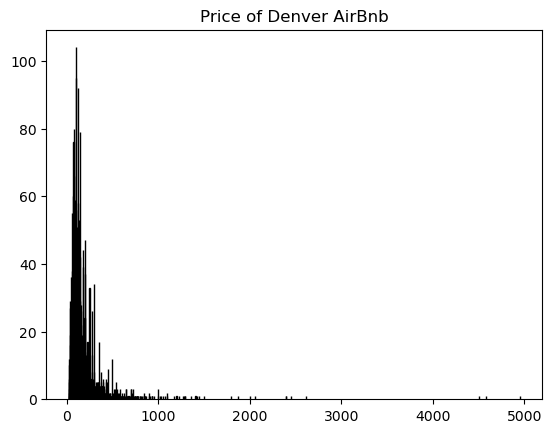

In [15]:
categories = listing['price'].value_counts().index
counts = listing['price'].value_counts().values
plt.title('Price of Denver AirBnb')
fig=plt.bar(categories, counts, color='#73260A', edgecolor='black')
# plt.gca().invert_yaxis()
plt.show()

In [16]:
listing[listing['price']>=1500].count().head()

id               12
latitude         12
longitude        12
price            12
shared_status    12
dtype: int64

In [17]:
listing.shape

(5221, 75)

In [18]:
# Out of over 5000 listings, there are 12 outliers above $1500. To focus our data a bit, i am going to drop those.  
listing = listing[listing['price']<1500]

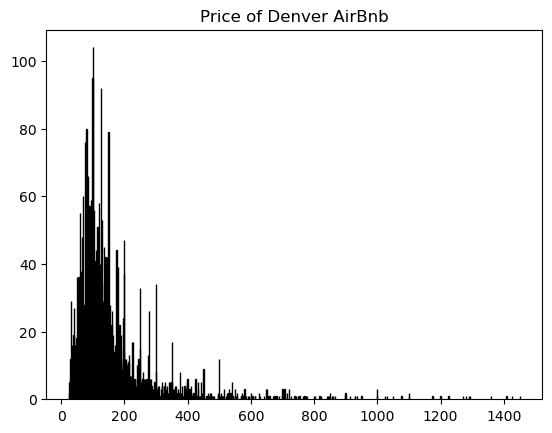

In [19]:
categories = listing['price'].value_counts().index
counts = listing['price'].value_counts().values
plt.title('Price of Denver AirBnb')
fig=plt.bar(categories, counts, color='#73260A', edgecolor='black')

plt.show()

In [20]:
# Might want to run a classification model, let's make groups in $25 bins
listing['25*k']=listing['price']//25+1

# Data is heavily skewed, making this in case I want to focus on the bulk of the "regular" priced houses (<~500)

In [21]:
#our data is pretty heavity skewed. I am going to split the data into two groupings. One less than $500, another more than $500.
#time permitting, I will run models on both scenarios. 

listing[(listing['price']<500) & (listing['price']>=450)].count().head()

id               29
latitude         29
longitude        29
price            29
shared_status    29
dtype: int64

In [22]:
#there are 29 homes between 450 and 500. So lets make the line at 450 them in the "expensive" category
listing2=listing[listing['price']<450]


In [23]:
listing2.to_csv('../data/450api_sentiment.csv', index=False)

In [24]:
listing.to_csv('../data/1500_sentiment_api.csv', index=False)